indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Frequency 337066831576.0
Beam area 1.3463426328049103e-12
Pixel area 9.401756332972848e-15
Pixels per beam area 143.20118338774208
Jy per Beam to Jy per pixel 0.006983182515275215
51.401666666666664 30.75469861111111
Average Beam:  0.22797503322363 11.398751661180588
[[  1.01175406e+03   1.13425000e+03   2.72537444e+06  -1.00000000e+00]]
[  32.48288486   64.96576972   97.44865457  129.93153943  162.41442429
  194.89730915  227.38019401  259.86307887  292.34596372  324.82884858
  357.31173344  389.7946183   422.27750316  454.76038802  487.24327287
  519.72615773  552.20904259  584.69192745  617.17481231]


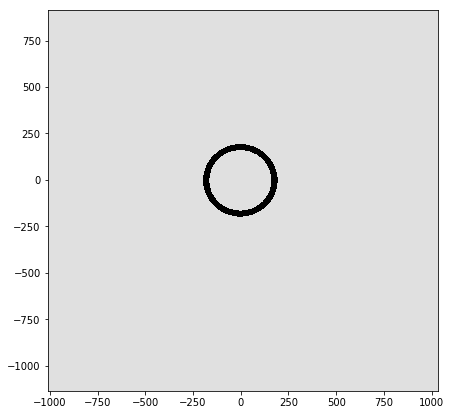

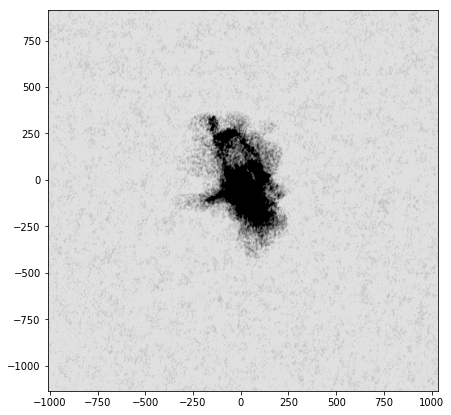

In [1]:
import numpy as np
#import pyfits as fits
import math
from astropy import wcs
from astropy.io import fits
from astropy.io import ascii
from scipy.interpolate import griddata
from scipy import stats
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
from astropy.table import Table, Column

%matplotlib inline

# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# CGS PHYSICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

c = 2.99792458e10       # speed of light CGS
h = 6.6260755e-27       # Planck's constant CGS
g = 6.67259e-8          # Grav const CGS
kb = 1.380658e-16       # Boltzmann's const CGS
a = 7.56591e-15         # Radiation constant CGS
sb = 5.67051e-5         # sigma (stefan-boltzmann const) CGS
qe =  4.803206e-10      # Charge of electron CGS
ev =  1.60217733e-12    # Electron volt CGS
na =  6.0221367e23      # Avagadro's Number
me =  9.1093897e-28     # electron mass CGS
mp =  1.6726231e-24     # proton mass CGS
mn = 1.674929e-24       # neutron mass CGS
mh = 1.673534e-24       # hydrogen mass CGS
amu =  1.6605402e-24    # atomic mass unit CGS
pi = 3.14159
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&
# ASTRONOMICAL CONSTANTS
# %&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&%&

# GENERAL
au = 1.496e13           # astronomical unit CGS
pc = 3.0857e18          # parsec CGS
yr = 3.155815e7         # sidereal year CGS
ms = 1.98900e+33        # solar mass CGS
rs = 6.9599e10          # sun's radius CGS
ls = 3.839e33           # sun's luminosity CGS
mm = 7.35000e+25        # moon mass CGS
mer = 5.97400e+27       # earth mass CGS
rer = 6.378e8           # earth's radius CGS
medd = 3.60271e+34      # Eddington mass CGS

# RADIO SPECIFIC
jy = 1.e-23                  # Jansky CGS
restfreq_hi = 1420405751.786 # 21cm transition (Hz)
restfreq_co = 115271201800.  # CO J=1-0 (Hz)
cm2perkkms_hi = 1.823e18     # HI column per intensity (thin)

pa=(90.0-29.5)*3.14159/180.0
#pa=(45.0)*3.14159/180.0
inc=45.0*3.14159/180.0

# FUNCTION
def icrs_hr(icrs):
    tmp0 = float(icrs[0])
    tmp01 = tmp0
    if tmp01 < 0:
        tmp0 = abs(tmp0)
    tmp1 = abs(float(icrs[1])/60.)
    tmp2 = abs(float(icrs[2])/3600.)
    icrs = tmp0 + tmp1 + tmp2
    if tmp01 < 0:
        icrs = icrs * -1.
    return icrs

# must be run on deprojected data

imagename='C17O_total.mom0.fits'
rms=4.34E-4
hdu = fits.open(imagename)
image = np.transpose(np.copy(hdu[0].data))
image=np.copy(hdu[0].data)

# PUT IN DEGREES or ICRS
ra_orig='03 25 36.400'
dec_orig='30 45 16.915'
while True:
    try:
        ra_fin = float(ra_orig)
        dec_fin = float(dec_orig)
    except ValueError:
        try:
            ra_fin = ra_orig.split(':')
            dec_fin = dec_orig.split(':')
            if len(ra_fin) == 1:
                ra_fin =  ra_orig.split(' ')            
            if len(dec_fin) == 1:
                dec_fin =  dec_orig.split(' ')
            if ((len(dec_fin) == 3) and (len(ra_fin) == 3)):
                ra_fin=icrs_hr(ra_fin)*15.
                dec_fin=icrs_hr(dec_fin)
                break
            else:
                continue
        except ValueError:
            input('Error: Press [RET] to continue.')
            continue
        continue
if (type(ra_fin) is float) and (type(dec_fin) is float):
    ra=ra_fin
    dec=dec_fin

header= hdu[0].header
w = wcs.WCS(hdu[0].header)
    #w.wcs.print_contents()
    #pixcrd = numpy.array([[0, 0], [24, 38], [45, 98]], numpy.float_)
    #print(pixcrd
    #pixcrd=np.array([[1000,1000],[1000,1000]])
    #world = w.wcs_pix2world(pixcrd, 0)
    #print(world)
pixscaledeg=header['CDELT2']
pixscale=header['CDELT2']*3600
bmaj=header['BMAJ']
bmin=header['BMIN']
npix=header['NAXIS1']
freq=header['CRVAL3']
omega=(pi*bmaj*bmin)*(pi/180.0)**2
beamarea=(omega)/(4.0*math.log(2.0))
pixelarea=(pixscaledeg*pi/180.0)**2
print('Frequency', freq)
print('Beam area', beamarea)
print('Pixel area', pixelarea)
jybm2jy=1.0/beamarea*pixelarea
pixelsperbeam=beamarea/pixelarea

print('Pixels per beam area', pixelsperbeam)
print('Jy per Beam to Jy per pixel',jybm2jy)
image=image[::-1][::-1][:][:]*jybm2jy
print(ra,dec)

avgbeam=(bmaj+bmin)/2.0*3600.0
print('Average Beam: ', avgbeam,avgbeam/pixscale)
aperturebase=avgbeam/pixscale/2.0

world=np.array([[ra,dec,0,0]  ])
pix=w.wcs_world2pix(world, 0)
print(pix)
xcen=pix[0][0]
ycen=pix[0][1]
apertures=np.arange(1.0,20.0, dtype=np.float)*aperturebase*aperturebase # edit this to increase mask size
print(apertures)

#xgrid_off=np.arange(npix,dtype=np.float)-npix/2.0
#xgrid_off=np.arange(npix,dtype=np.float)-1016
#ygrid_off=np.arange(npix,dtype=np.float)-npix/2.0

xgrid_off=np.arange(npix,dtype=np.float)-xcen
ygrid_off=np.arange(npix,dtype=np.float)-ycen

ygrid_proj=ygrid_off #/np.cos(inc)
#print(ygrid_proj

xgrid,ygrid=np.meshgrid(xgrid_off,ygrid_proj)

r = np.sqrt(xgrid**2 + (ygrid)**2)
mask1 = r < apertures[5]
mask2 = r > apertures[4] 
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_proj[:],mask[:,:], cmap='gray_r', vmin=-0.014, vmax=0.1)
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],image[0,0,:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

1.0559233055555555
[False False False ..., False False False]
(1, 1, 2048, 2048)
(2048, 2048)
(2048, 2048)


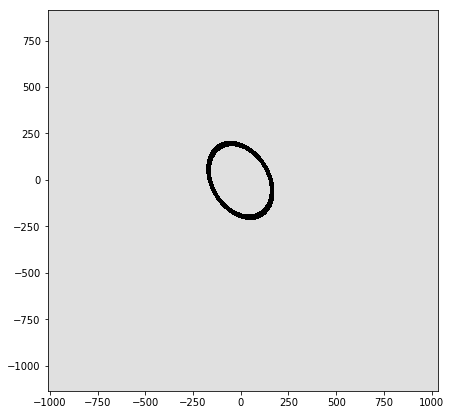

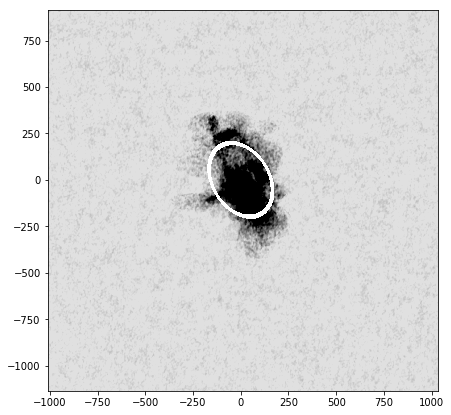

In [2]:

print(pa)

xgrid_rot= (xgrid * np.cos(pa) - ygrid * np.sin(pa)) # disk major axis
ygrid_rot= (xgrid * np.sin(pa) + ygrid * np.cos(pa)) # disk minor axis

#print(xgrid_rot.shape
#print(ygrid_rot.shape
#print(xgrid_rot[1000:1050,1000:1050]
#print(ygrid_rot[1000:1050,1000:1050]


r = np.sqrt(xgrid_rot**2 + (ygrid_rot/np.cos(inc))**2)
mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],mask[:,:], cmap='gray_r', vmin=-0.014, vmax=0.1)

mask1 = r > apertures[5]
mask2 = r < apertures[6]
mask=mask1*mask2
print(mask[1024][:])
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

print(image.shape)
print(mask.shape)
maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
print(maskedimage.shape)
plt.pcolormesh(xgrid_off[:],ygrid_off[:],maskedimage[:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)

#ymin=int(round(ycen-apertures)+1)
#ymax=int(round(ycen+apertures)+1)
#xmin=int(round(xcen-apertures)+1)
#xmax=int(round(xcen+apertures)+1)
#print(xmin,xmax,ymin,ymax

32.4828848583 0.319916367531 0.00710699434127 0.319916367531 0.00710699434127 2345
64.9657697166 0.944585323334 0.0213149216214 0.944585323334 0.0213149216214 7033
97.448654575 1.9220995903 0.0355076953955 1.9220995903 0.0355076953955 11716
129.931539433 2.73187541962 0.0497307761816 2.73187541962 0.0497307761816 16409
162.414424292 2.55889773369 0.0639326420593 2.55889773369 0.0639326420593 21095
194.89730915 1.96848607063 0.0781466307419 1.96848607063 0.0781466307419 25785
227.380194008 1.66877496243 0.092354558022 1.66877496243 0.092354558022 30473
259.863078867 1.49417281151 0.106529147589 1.49417281151 0.106529147589 35150
292.345963725 1.26969563961 0.1208158731 1.26969563961 0.1208158731 39864
324.828848583 0.777819097042 0.134938940747 0.777819097042 0.134938940747 44524
357.311733441 0.542453587055 0.149162021533 0.542453587055 0.149162021533 49217
389.7946183 0.360773861408 0.163394194423 0.360773861408 0.163394194423 53913
422.277503158 0.186929106712 0.177568783989 0.186929

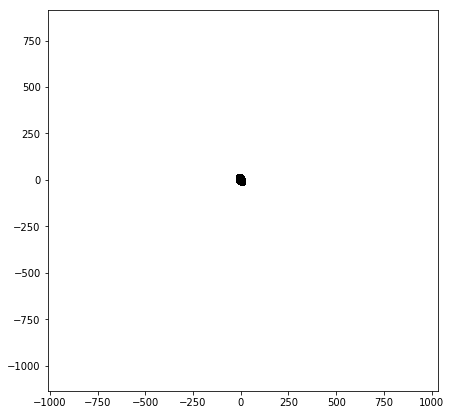

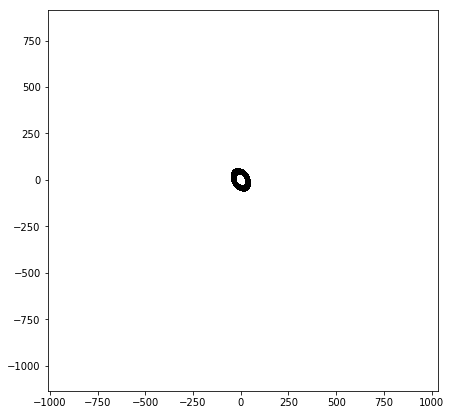

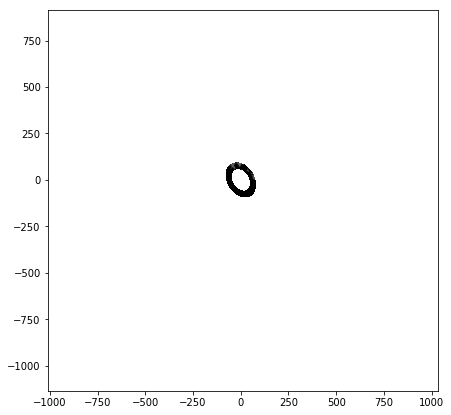

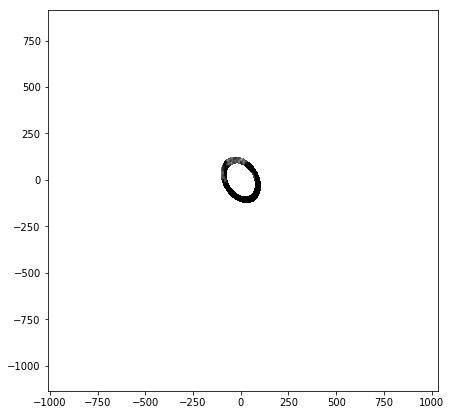

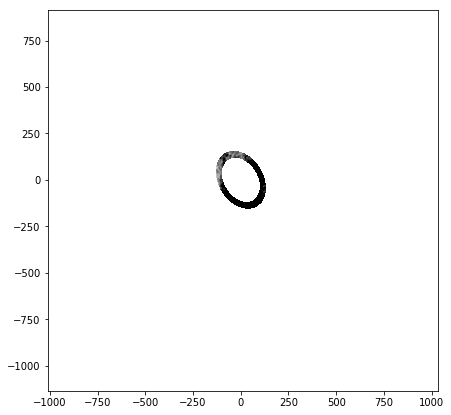

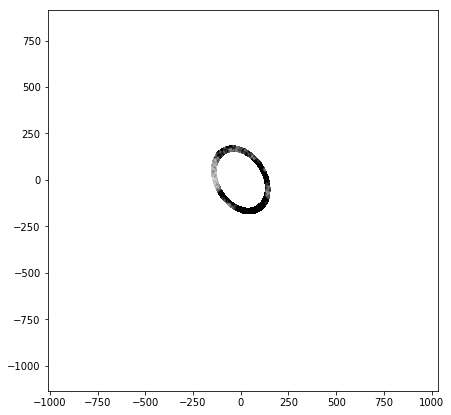

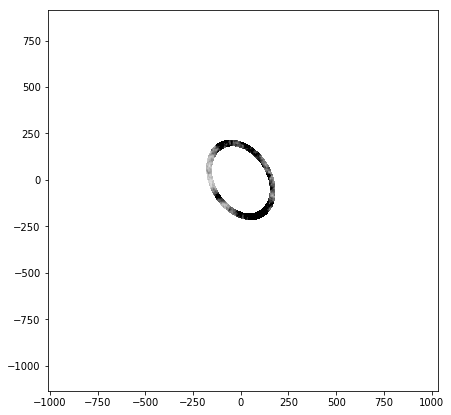

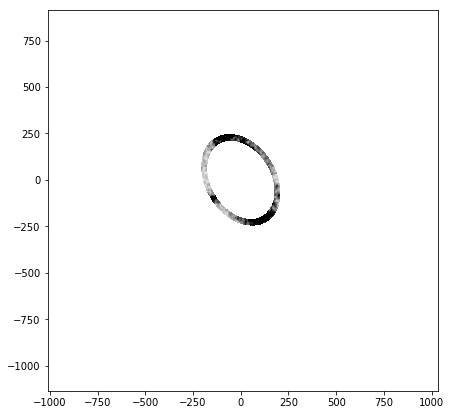

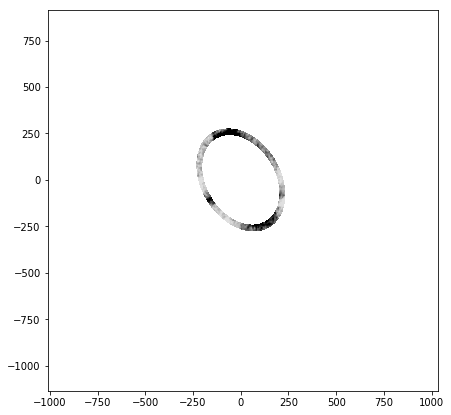

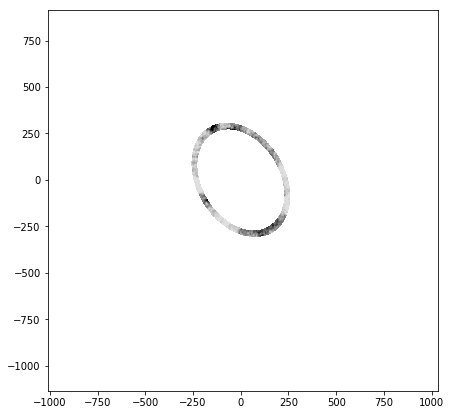

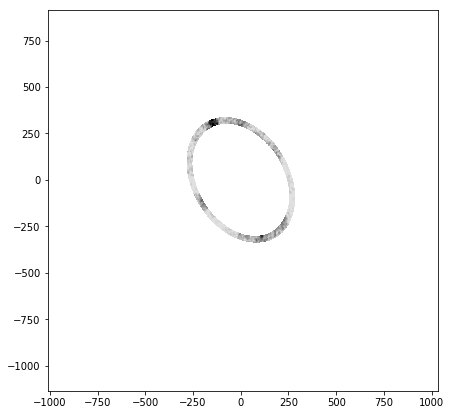

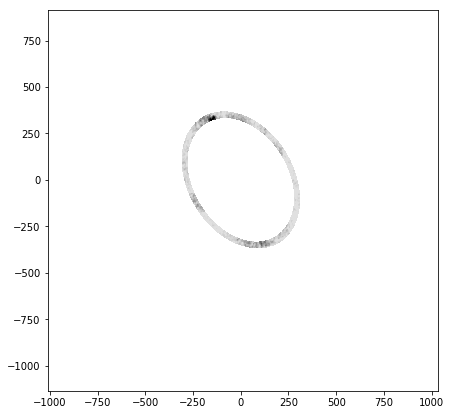

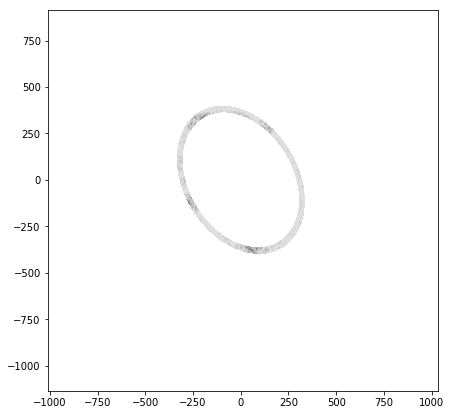

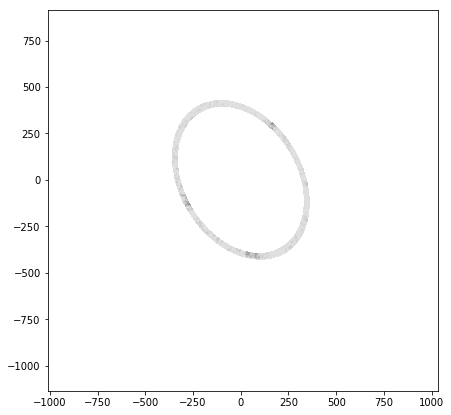

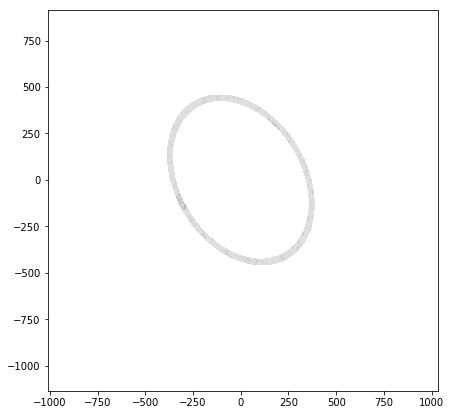

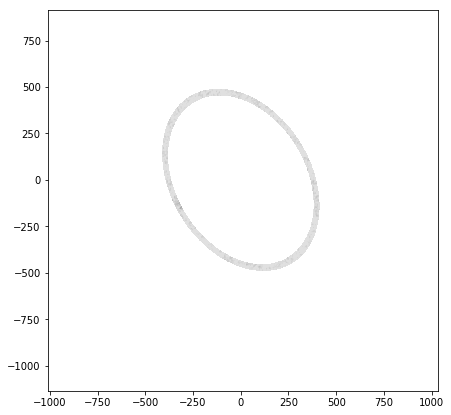

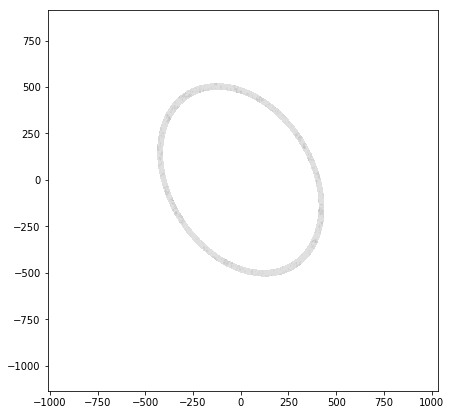

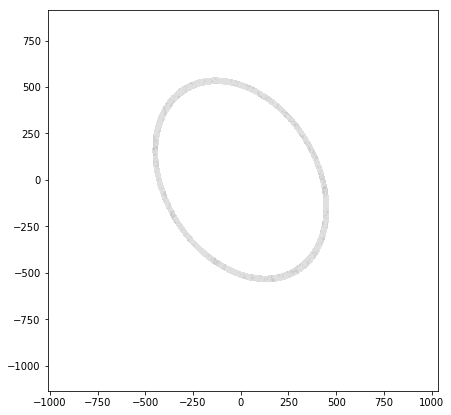

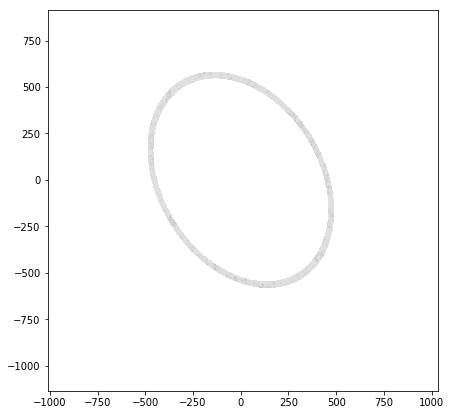

In [3]:
aper_fluxes=np.zeros(len(apertures))
error_aper_fluxes=np.zeros(len(apertures))
diff_aper_fluxes=np.zeros(len(apertures))
error_diff_aper_fluxes=np.zeros(len(apertures))
diff_area=np.zeros(len(apertures))

for i in range(len(apertures)):
    if i == 0:
        mask = r > apertures[0]
        maskinverse=r < apertures[0]
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=mask)
        npixels=np.sum(~mask)
    elif i > 0:  
        mask1 = r > apertures[i-1]
        mask2 = r <= apertures[i]
        mask = mask1*mask2
        maskinverse=~mask
        maskedimage=np.ma.MaskedArray(image[0,0,:,:], mask=~mask)
        npixels=np.sum(mask)
    fig=plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.pcolormesh(xgrid_off[:],ygrid_off[:],maskedimage[:,:]/jybm2jy, cmap='gray_r', vmin=-0.0014, vmax=0.01)
    aper_fluxes[i]=np.sum(maskedimage)

    error_aper_fluxes[i]=npixels/pixelsperbeam*rms
    if i == 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159
    elif i > 0:
        diff_aper_fluxes[i]=aper_fluxes[i].copy()
        error_diff_aper_fluxes[i]=error_aper_fluxes[i].copy()
        diff_area[i]=(apertures[i]*pixscale*230.0)**2*3.14159 -(apertures[i-1]*pixscale*230.0)**2*3.14159

    print(apertures[i], aper_fluxes[i],error_aper_fluxes[i], diff_aper_fluxes[i],error_diff_aper_fluxes[i],npixels)

    

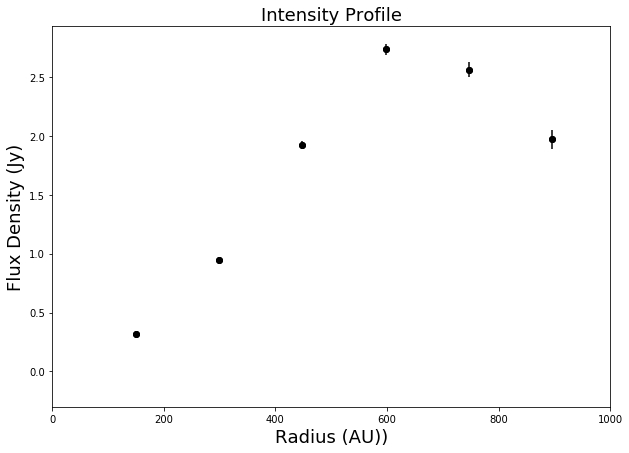

In [4]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(0,1000.0)
#ax.set_ylim(-0.001,0.01)

radii=apertures*pixscale*230.0
lin1=ax.plot(radii,diff_aper_fluxes,marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii,diff_aper_fluxes, yerr=error_diff_aper_fluxes, fmt='o',color='black')

ax.set_title('Intensity Profile', fontsize=18)
ax.set_ylabel('Flux Density (Jy)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-Intensity-rad-xsec-concat.eps')

472.7541523329254
      R      
-------------
75.4760209606
76.3951991317
77.3255714345
78.2672741959
79.2204454017
80.1852247213
81.1617535214
 82.150174893
83.1506336684
84.1632764445
          ...
265.793505317
269.030448455
272.306812423
275.623077306
278.979729033
282.377259452
  285.8161664
289.296953778
292.820131623
296.386216183
299.995729995
Length = 115 rows
-0.418746248482 2.31465548932 -0.999946625036 2.99624228455e-226 0.000407017319387
[ 25.31169123  19.05134627 -99.         -99.         -99.         -99.         -99.
 -99.         -99.         -99.         -99.         -99.         -99.         -99.
 -99.         -99.         -99.         -99.         -99.        ]
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),)
[  25.31169123   19.05134627 -141.16404453 -125.14297228 -113.97924118
 -105.60121417  -99.          -93.61625945  -89.11100824  -85.26495751
  -81.92898006  -78.99756961  -76.39364438  -74.05936998  -71.95036905
  -70.03193126  -6

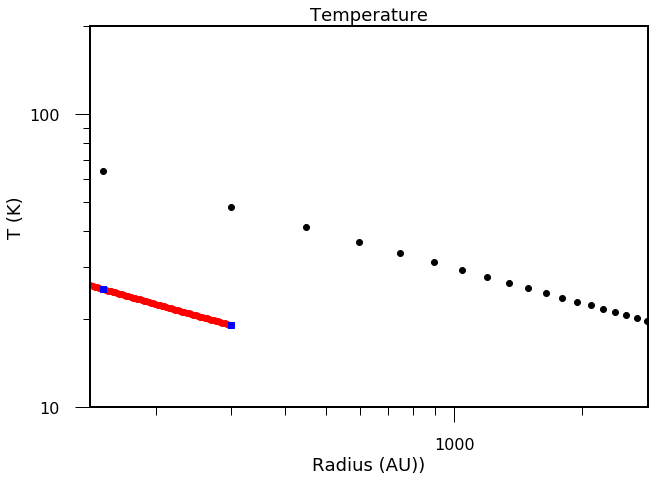

In [5]:
L_system=8.3
teq_at_1AU=(L_system*ls/(16.0*sb*pi*(au)**2))**0.25
print(teq_at_1AU)
temp=(radii/1.0)**(-0.4)*teq_at_1AU
#print(radii,temp

modeltemp=ascii.read('TvsR.dat',names=['R', 'T'])

modeltemp['R']=modeltemp['R']/1.496e13
#print(modeltemp
newtemp=griddata(modeltemp['R'],modeltemp['T'],radii,method='linear',fill_value=-99.0)
ind = (modeltemp['R'] > 75.0).nonzero()

print(modeltemp['R'][ind])


slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(modeltemp['R'][ind]),np.log10(modeltemp['T'][ind]))
print(slope, intercept, r_value, p_value, std_err)
newtempextrap=(radii/radii[6])**(slope)*newtemp[6]
print(newtemp)

ind = (newtemp == -99.0).nonzero()
print(ind)
newtemp[ind]=newtempextrap[ind]

print(newtemp)

fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

radii=apertures*pixscale*230.0
ax.set_xlim(min(radii)-10,max(radii)+10)
ax.set_ylim(10,200.0)

lin1=ax.loglog(radii,temp,marker='o',color='black',linestyle='none')
lin1=ax.loglog(modeltemp['R'],modeltemp['T'],marker='o',color='red',linestyle='none')
lin1=ax.loglog(radii,newtemp,marker='s',color='blue',linestyle='none')
lin1=ax.loglog(radii,newtempextrap,marker='s',color='blue',linestyle='none')

ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)
ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Temperature', fontsize=18)
ax.set_ylabel('T (K)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-Temp-rad-xsec-concat.eps')


def emissive_mass(flux=None,lam=None,lam0=None,beta=None,kappa0=None,distance=None,temp=None):
    #temp=30.0
    kb=1.36e-16
    dgr=100.0
    flux=flux*1.0e-23
    nu=3.0e11/lam
    #print(nu/1.0e9, 'GHz'
    #kappa0=3.5
    kappa=kappa0*(lam0/lam)**beta
    #print(kappa, ' at ',lam,' mm'
    distance=distance*3.09e18
    mass=distance**2*flux*3e10**2/(2.0*kappa*kb*nu**2*temp)*dgr

    return mass

diff_percent_errors=error_diff_aper_fluxes/diff_aper_fluxes
percent_errors=error_aper_fluxes/aper_fluxes
mass_vs_r=emissive_mass(diff_aper_fluxes,1.3,1.3,1.0,0.899,230.0,newtemp)
total_mass_vs_r=emissive_mass(aper_fluxes,1.3,1.3,1.0,0.899,230.0,newtemp)

#print(mass_vs_r

sigma=mass_vs_r/(diff_area*1.496e13**2)
#sigma=mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
sigma2=total_mass_vs_r/(((apertures*pixscale*230.0*1.496e13)**2)*3.14159)
print(sigma)
#,sigma2

data = Table([radii, sigma, newtemp], names=['R(AU)', 'sigma(g/cm-2)', 'T(K)'])
ascii.write(data, 'sigmavsR-concat.dat',overwrite=True)

[ 149.42127035]


TypeError: Improper input: N=2 must not exceed M=1

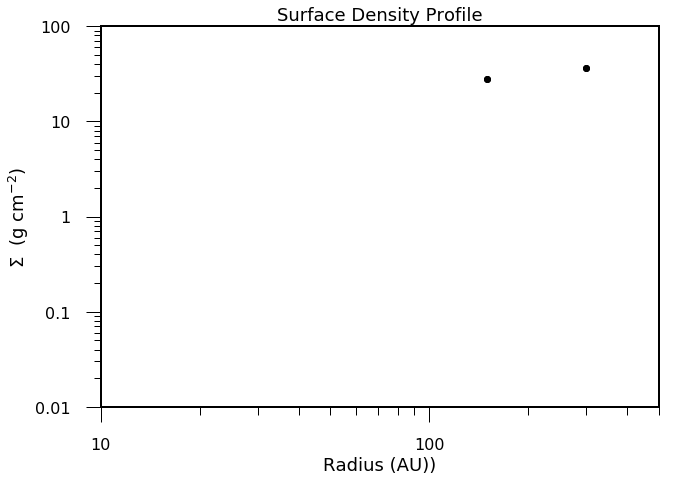

In [6]:
fig=plt.figure(figsize=(10,7))
#fig, ax1 = plt.subplots()
ax = fig.add_subplot(111)
ax.set_xlim(10,500.0)
ax.set_ylim(0.01,100.0)

ind = (radii < 375.0).nonzero()

radii=apertures*pixscale*230.0
lin1=ax.loglog(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
#lin2=ax.errorbar(radii[ind],diff_aper_fluxes[ind], yerr=error_diff_aper_fluxes[ind], fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)


plt.savefig('L1448N-surface-density-lograd-xsec-concat.eps')

from scipy import optimize

def func(x, a, b):
    return x**a +b

ind = (radii < 250.0).nonzero()
#print ind
print(radii[ind])
logerrors=0.434*diff_percent_errors
popt,pcov = optimize.curve_fit(func, np.log10(radii[ind]),np.log10(sigma[ind]),sigma=logerrors[ind])

perr = np.sqrt(np.diag(pcov))
print(popt,perr)

In [ ]:
fig=plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_xlim(10,500.0)
#ax.set_ylim(-0.001,0.01)
ind = (radii < 375.0).nonzero()

#radii=apertures*pixscale*230.0
lin1=ax.plot(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
lin1err=ax.errorbar(radii[ind],sigma, yerr=sigma*diff_percent_errors, fmt='o',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax.tick_params('both', which='major', length=15, width=1, pad=15)
ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(ticks_font)

#for axis in [ax.xaxis, ax.yaxis]:
#    axis.set_major_formatter(ScalarFormatter())
#    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax.spines[axis].set_linewidth(2)

ax.set_title('Surface Density Profile', fontsize=18)
ax.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax.set_xlabel('Radius (AU))', fontsize=18)
plt.savefig('L1448N-surface-density-linear-xsec-concat.eps')


In [ ]:
Omega=np.sqrt(g*1.06*1.99e33)/(2.0*pi*(radii*au)**1.5)
print(0.75/np.sin(45.0*pi/180.0), math.sin(35.0*pi/180.0))

cs=(1.5*kb*temp*2.0/(3.34e-24*2.36))**0.5
print('radii :',radii)
print('omega :', Omega,1.0/Omega/3.14e7)
print('sound speed:',cs/1.0e5)
Q_toomre= Omega*cs/(pi*g*sigma)
print('Toomre Q:',Q_toomre)

In [ ]:
    fig=plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    ax.set_xlim(10,500.0)
    ax.set_ylim(0,4)
    ind = (radii < 375.0).nonzero()

    #radii=apertures*pixscale*230.0
    lin1=ax.plot(radii[ind],Q_toomre[ind],marker='o',color='black',linestyle='none')
    lin1err=ax.errorbar(radii[ind],Q_toomre[ind], yerr=Q_toomre[ind]*diff_percent_errors[ind], fmt='o',color='black')
    #lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
    #lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
    ax.tick_params('both', which='major', length=15, width=1, pad=15)
    ax.tick_params('both', which='minor', length=7.5, width=1, pad=15)
    
    ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontproperties(ticks_font)
    
    #for axis in [ax.xaxis, ax.yaxis]:
    #    axis.set_major_formatter(ScalarFormatter())
    #    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
    for axis in ['top','bottom','left','right']:
       ax.spines[axis].set_linewidth(2)
    
    ax.set_title('Toomre Q', fontsize=18)
    ax.set_ylabel('Q', fontsize=18)
    ax.set_xlabel('Radius (AU))', fontsize=18)
    plt.savefig('L1448N-toomre-Q-linear-xsec-concat.eps')


In [ ]:
#fig=plt.figure(figsize=(10,7))
fig, ax1 = plt.subplots(figsize=(10,7))

ax2=ax1.twinx()

#ax = fig.add_subplot(111)
ax1.set_xlim(10,500.0)
ax1.set_ylim(0.005,50.0)

ind = (radii < 375.0).nonzero()

radii=apertures*pixscale*230.0
ax1.loglog(radii[ind],sigma[ind],marker='o',color='black',linestyle='none')
ax1.errorbar(radii[ind],sigma[ind], yerr=sigma[ind]*diff_percent_errors[ind], fmt='o',color='black')
ax1.errorbar(radii[ind],diff_aper_fluxes[ind], yerr=error_diff_aper_fluxes[ind], fmt='d',color='black')
#lin1=ax.plot(radii,sigma2,marker='o',color='black',linestyle='none')
#lin1err=ax.errorbar(radii,sigma2, yerr=sigma2*percent_errors, fmt='o',color='black')
ax1.tick_params('both', which='major', length=15, width=1, pad=15)
ax1.tick_params('both', which='minor', length=7.5, width=1, pad=15)

ticks_font = mpl.font_manager.FontProperties(size=16, weight='normal', stretch='normal')

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
   ax1.spines[axis].set_linewidth(2)

ax1.set_title('', fontsize=18)
ax1.set_ylabel('$\Sigma$  (g cm$^{-2}$)', fontsize=18)
ax1.set_xlabel('Radius (AU))', fontsize=18)


ax2.loglog(radii,newtempextrap,marker='s',color='blue',linestyle='none')
ax2.tick_params('both', which='major', length=15, width=1, pad=15)
ax2.tick_params('both', which='minor', length=7.5, width=1, pad=15)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
            label.set_fontproperties(ticks_font)

for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

    ax2.set_ylabel('Temperature (K)', color='b', fontsize=18)
    
for tl in ax2.get_yticklabels():
    tl.set_color('b')
    
plt.savefig('L1448N-surface-dens-int-temp-lograd-xsec-concat.eps')

from scipy import optimize

def func(x, a, b):
    return x**a +b

ind = (radii < 250.0).nonzero()
#print ind
print(radii[ind])
logerrors=0.434*diff_percent_errors
popt,pcov = optimize.curve_fit(func, np.log10(radii[ind]),np.log10(sigma[ind]),sigma=logerrors[ind])

perr = np.sqrt(np.diag(pcov))
print(popt,perr)